<strong>DSCI 100 Group Project Proposal</strong> <br>
testing title 2 change
Athan Mellios <br>
Aviva Mei <br>
Alvin Zhou <br>
Richard Luo <br>

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [3]:

temp <- tempfile()
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00368/Facebook_metrics.zip",temp)

#Reading the data in R
facebook <- read_csv2(unz(temp, "dataset_Facebook.csv"))
head(facebook)
unlink(temp)

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  `Page total likes` = col_double(),
  Type = col_character(),
  Category = col_double(),
  `Post Month` = col_double(),
  `Post Weekday` = col_double(),
  `Post Hour` = col_double(),
  Paid = col_double(),
  `Lifetime Post Total Reach` = col_double(),
  `Lifetime Post Total Impressions` = col_double(),
  `Lifetime Engaged Users` = col_double(),
  `Lifetime Post Consumers` = col_double(),
  `Lifetime Post Consumptions` = col_double(),
  `Lifetime Post Impressions by people who have liked your Page` = col_double(),
  `Lifetime Post reach by people who like your Page` = col_double(),
  `Lifetime People who have liked your Page and engaged with your post` = col_double(),
  comment = col_double(),
  like = col_double(),
  share = col_double(),
  `Total Interactions` = col_double()
)



Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
139441,Photo,2,12,4,3,0,2752,5091,178,109,159,3078,1640,119,4,79,17,100
139441,Status,2,12,3,10,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130,29,164
139441,Photo,3,12,3,3,0,2413,4373,177,113,154,2812,1503,132,0,66,14,80
139441,Photo,2,12,2,10,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572,147,1777
139441,Photo,2,12,2,3,0,7244,13594,671,410,580,6228,3200,396,19,325,49,393
139441,Status,2,12,1,9,0,10472,20849,1191,1073,1389,16034,7852,1016,1,152,33,186


<strong>Introduction:</strong> <br>


<strong>Preliminary Exploratory Data Analysis:</strong> <br>

<strong>Methods:</strong> <br>

<strong>Expected outcomes and significance:</strong> <br>

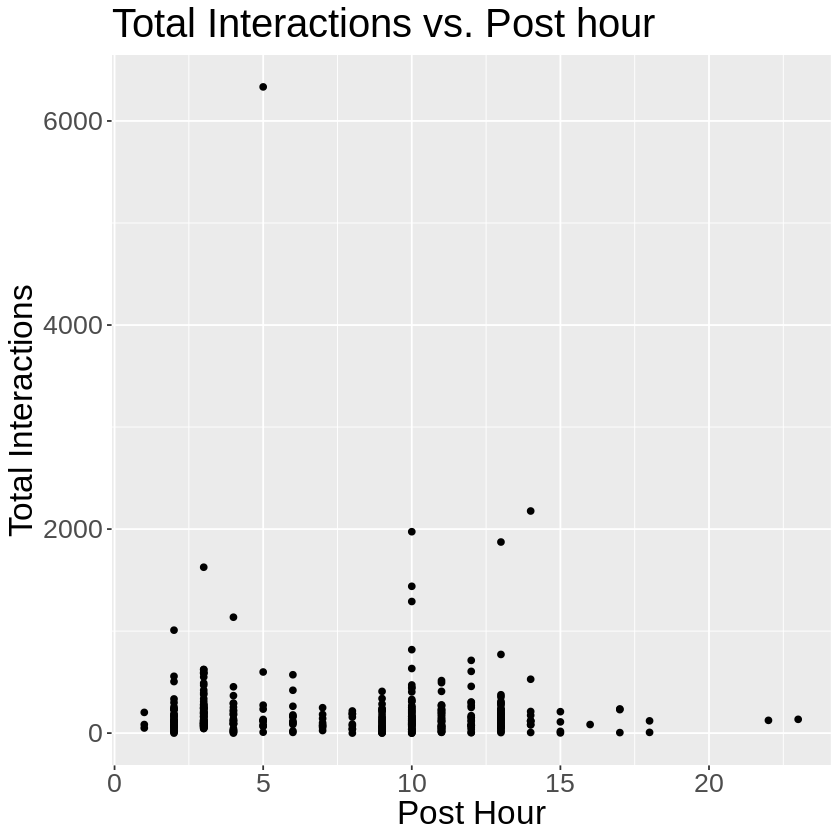

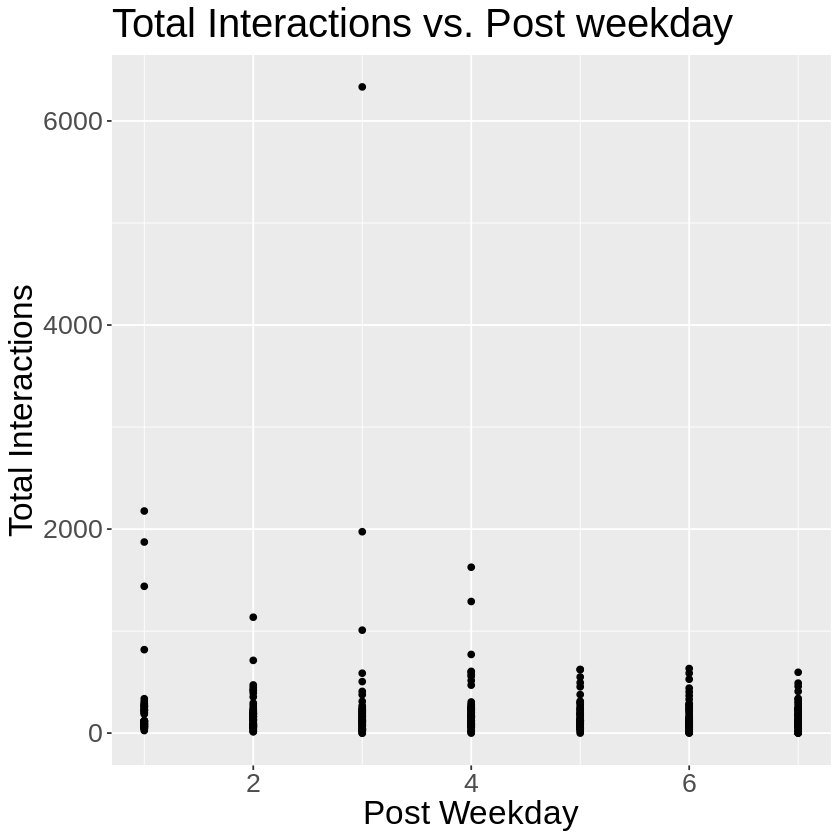

Page total likes,Type,Category,Total Interactions,average_total_interactions
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
123047,Photo,3,1439,210.4271
137020,Photo,2,1626,210.4271
92507,Photo,3,1873,210.4271
135428,Photo,1,1974,210.4271
111620,Photo,3,2177,210.4271
130791,Photo,2,6334,210.4271


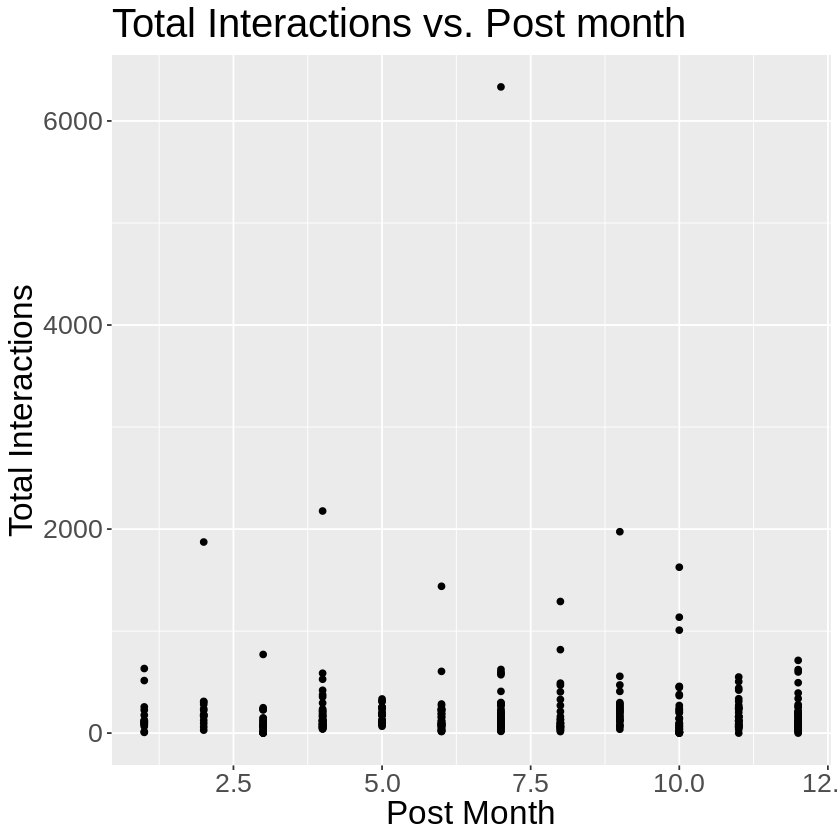

In [58]:
set.seed(1)                      

#Split into training (75 percent of data set) and test data
facebook_split <- initial_split(facebook, prop = 0.75, strata = `Total Interactions`)
facebook_train <- training(facebook_split)
facebook_test <- testing(facebook_split)

#ScatterPlot for Total Interactions Every Hour
facebook_plot = ggplot(data = facebook_train, aes(x = `Post Hour`, y = `Total Interactions`)) +
    geom_point() +
    labs(title = "Total Interactions vs. Post hour") +
    theme(text = element_text(size = 20))
facebook_plot

#ScatterPlot for Total Interactions Every Weekday
facebook_plot2 = ggplot(data = facebook_train, aes(x = `Post Weekday`, y = `Total Interactions`)) +
    geom_point() +
    labs(title = "Total Interactions vs. Post weekday") +
    theme(text = element_text(size = 20))
facebook_plot2

#Plot for Total Interactions Every Month
facebook_plot3 = ggplot(data = facebook_train, aes(x = `Post Month`, y = `Total Interactions`)) +
    geom_point() +
    labs(title = "Total Interactions vs. Post month") +
    theme(text = element_text(size = 20))
facebook_plot3

#Average of total interactions
results <- mean(facebook_train[["Total Interactions"]])

#Exploratory Data Analysis Table
fb_test_table = facebook_train %>%
    mutate(facebook_train, average_total_interactions = results) %>%
    select(`Page total likes`, Type, Category, `Total Interactions`, average_total_interactions) %>% 
    arrange(`Total Interactions`)
tail(fb_test_table)

In [48]:
?mean

mean {base},R Documentation
x,"An R object. Currently there are methods for numeric/logical vectors and date, date-time and time interval objects. Complex vectors are allowed for trim = 0, only."
trim,the fraction (0 to 0.5) of observations to be trimmed from each end of x before the mean is computed. Values of trim outside that range are taken as the nearest endpoint.
na.rm,a logical value indicating whether NA values should be stripped before the computation proceeds.
...,further arguments passed to or from other methods.
